In [1]:
import numpy as np 
import time 
import os  
import xarray as xr
import subprocess
import matplotlib.pyplot as plt
from matplotlib import colors
import cartopy.crs as ccrs

In [2]:
## import self defined functions
from sys import path 
# insert at 1, 0 is the script path (or '' in REPL)
path.insert(1, '/tigress/cw55/local/python_lib')
from cg_funcs import global_mean_xarray 

In [3]:
plt.rcParams['font.size'] = '6'

In [4]:
def plot_ds12_diff(ds_list,level = np.arange(0,300,10), dlevel = np.arange(-10,10.1,0.5)):
    fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(8,2),dpi=200)
    axs = axs.flatten()
    for i in range(2):
        ax=axs[i]
        da = ds_list[i]
        da.plot(ax=ax, levels=level, extend='both')  
        ax.set_title(f'{da.name} GM: {global_mean_xarray(da).values:4.2f}') 
    ax=axs[2]
    da = ds_list[1]-ds_list[0]
    da.plot(ax=ax, levels=dlevel, extend='both') 
    # ax.set_title(f'diff mean: {(da.mean()).values:4.2f}')  
    ax.set_title(f'diff GM: {global_mean_xarray(da).values:4.2f}') 
    for ax in axs:
        ax.set(xlabel=None,ylabel=None)
    fig.tight_layout()  
def plot_zonal_ta_diff(ds_list,level = np.arange(200,330,10), dlevel = np.arange(-3,3.1,0.5)):
    fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(8,2),dpi=200)
    axs = axs.flatten()
    for i in range(2):
        ax=axs[i]
        da = ds_list[i]
        da.plot(ax=ax, levels=level, extend='both')  
        ax.set_title(f'{da.name} mean: {(da.mean()).values:4.2f}')  
    ax=axs[2]
    da = (ds_list[1]-ds_list[0])
    da.plot(ax=ax, levels=dlevel, extend='both') 
    ax.set_title(f'diff mean: {(da.mean()).values:4.2f}')  
    # ax.set_title(f'diff GM: {global_mean_xarray(da).values:4.2f}') 
    for ax in axs:
        ax.set(xlabel=None,ylabel=None)
        ax.invert_yaxis()
    fig.tight_layout()  

def plot_zonal_tdt_diff(ds_list,level = np.arange(-2,2,0.1), dlevel = np.arange(-0.5,0.51,0.05)):
    fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(8,2),dpi=200)
    axs = axs.flatten()
    for i in range(2):
        ax=axs[i]
        da = ds_list[i]
        da.plot(ax=ax, levels=level, extend='both')  
        ax.set_title(f'{da.name} mean: {(da.mean()).values:4.2f} [K/day]')  
    ax=axs[2]
    da = (ds_list[1]-ds_list[0])
    da.plot(ax=ax, levels=dlevel, extend='both') 
    ax.set_title(f'diff mean: {(da.mean()).values:4.2f} [K/day]')   
    for ax in axs:
        ax.set(xlabel=None,ylabel=None)
        ax.invert_yaxis()
    fig.tight_layout()  

def plot_GM_diff(ds_list,var_info):
    fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(3,2),dpi=200)
    ax=axs
    linesty = ['-', '--']
    for i in range(2): 
        # da = global_mean_xarray(ds_list[i].groupby('time.year').mean('time'))
        # ax.plot(da.year,da) 
        da = global_mean_xarray(ds_list[i])
        timeaxis = da.indexes['time'].to_datetimeindex()
        ax.plot(timeaxis,da,linestyle=linesty[i]) 
    if len(var_info) == 2: 
        ax.set_title(f'{var_info[0]} | {var_info[1]} = {da[var_info[1]].data}')   
    else:
        ax.set_title(f'{var_info}') 
    fig.tight_layout()  
    

#  import data

In [5]:
year_list = np.arange(1996,2005)

In [6]:
file_path = '/scratch/gpfs/cw55/AM4/work/CTL2000_test2000s_nn_stellarcpu_intelmpi_22_768PE/'
ds= xr.open_mfdataset([file_path+f'POSTP/{year}0101.atmos_month.nc' for year in year_list])  
ds_nn= ds.rename({'grid_yt':'lat','grid_xt':'lon'})

file_path = '/scratch/gpfs/cw55/AM4/work/CTL2000_test2000s_nn_stellarcpu_intelmpi_22_768PE_base/' 
ds= xr.open_mfdataset([file_path+f'POSTP/{year}0101.atmos_month.nc' for year in year_list])  
ds_ba= ds.rename({'grid_yt':'lat','grid_xt':'lon'})

# plot results

## temp sturcture

GM trend


/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()


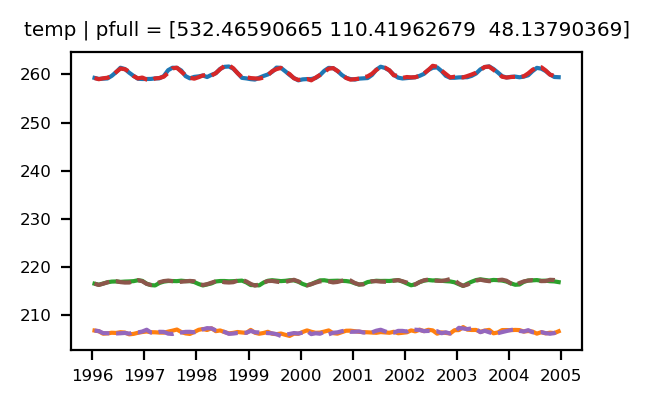

In [7]:
print('GM trend')
var = 'temp'
ds_list = [ds_ba[var].sel(pfull=[500,100,50],method='nearest'),
           ds_nn[var].sel(pfull=[500,100,50],method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull']) 


GM trend


/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates

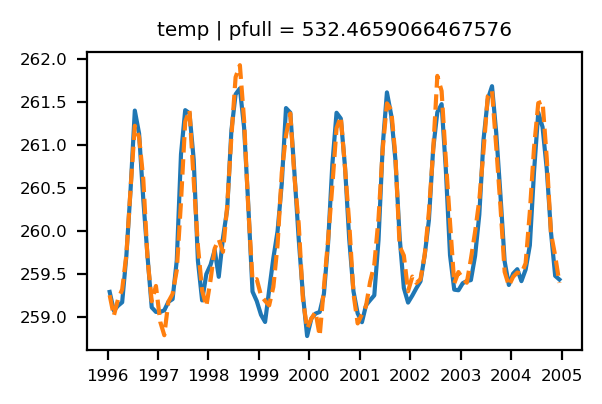

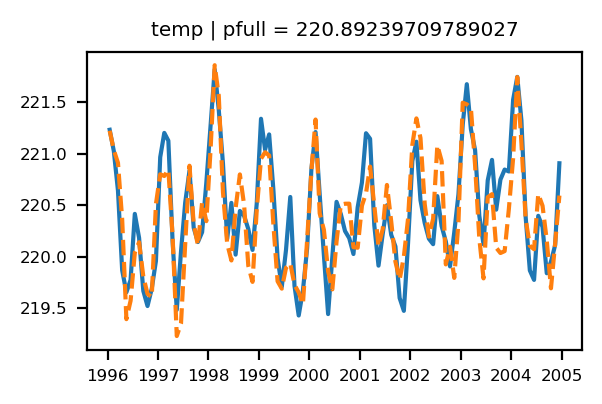

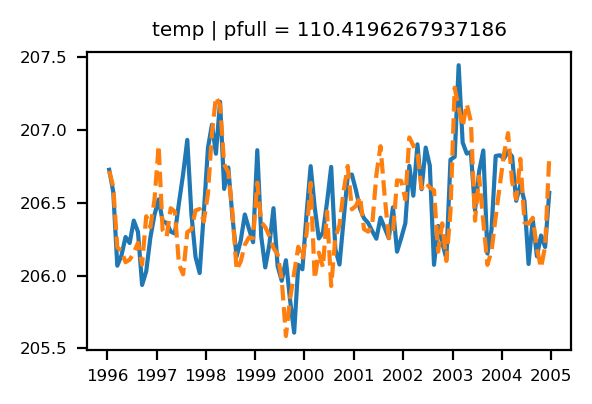

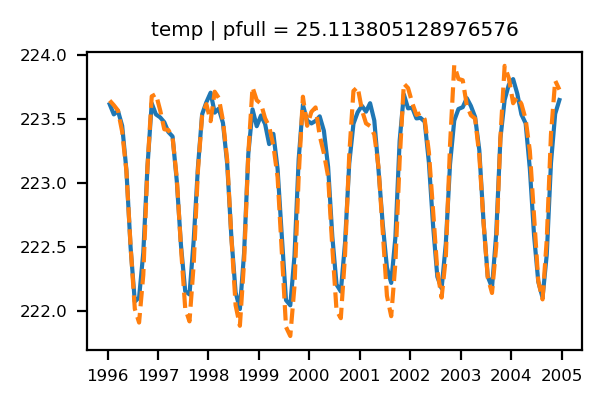

In [8]:

print('GM trend')
var = 'temp'
ds_list = [ds_ba[var].sel(pfull=500,method='nearest'),
           ds_nn[var].sel(pfull=500,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])
ds_list = [ds_ba[var].sel(pfull=200,method='nearest'),
           ds_nn[var].sel(pfull=200,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])
ds_list = [ds_ba[var].sel(pfull=100,method='nearest'),
           ds_nn[var].sel(pfull=100,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])
ds_list = [ds_ba[var].sel(pfull=30,method='nearest'),
           ds_nn[var].sel(pfull=30,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])


GM trend


/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()


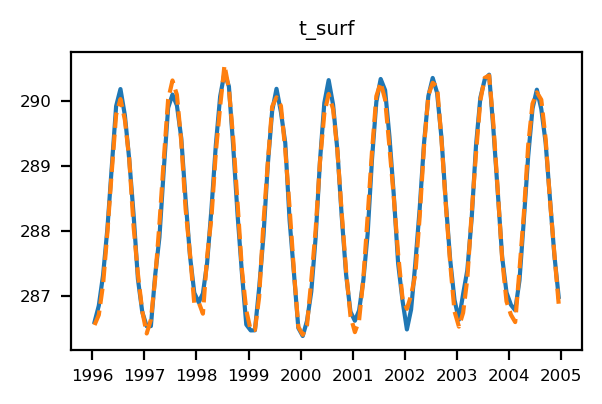

In [9]:
var = 't_surf' 
print('GM trend') 
ds_list = [ds_ba[var],
           ds_nn[var]] 
plot_GM_diff(ds_list,var) 


GM trend


/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates

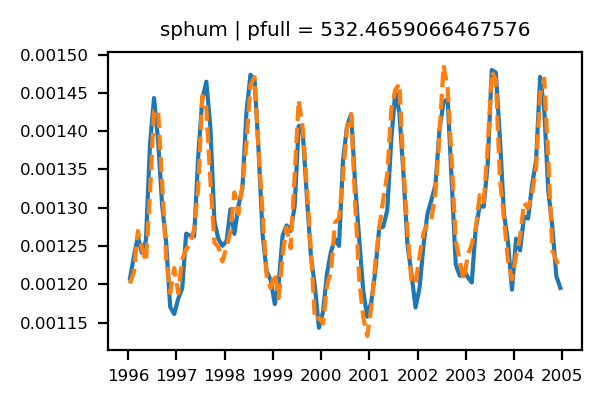

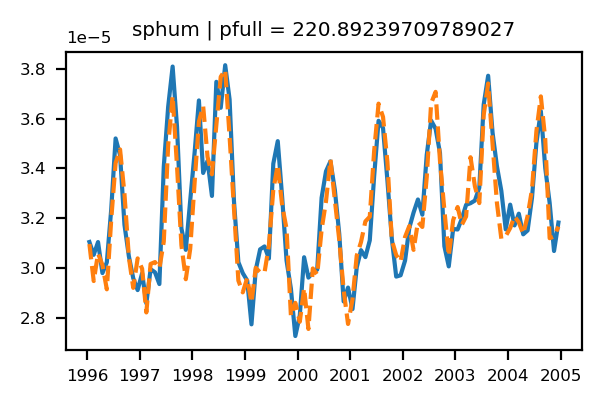

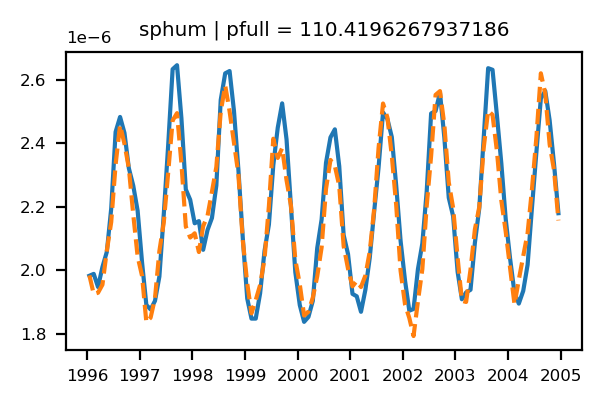

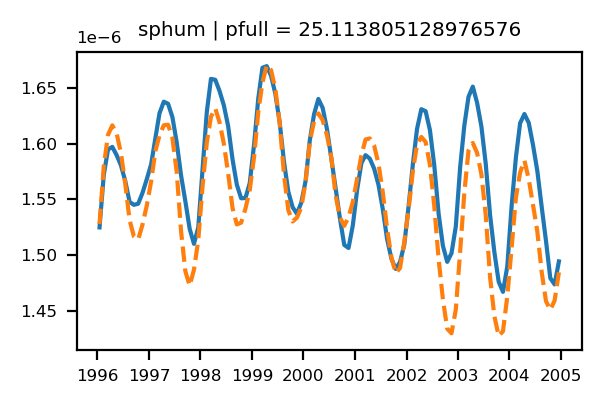

In [10]:

print('GM trend')
var = 'sphum'
ds_list = [ds_ba[var].sel(pfull=500,method='nearest'),
           ds_nn[var].sel(pfull=500,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])
ds_list = [ds_ba[var].sel(pfull=200,method='nearest'),
           ds_nn[var].sel(pfull=200,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])
ds_list = [ds_ba[var].sel(pfull=100,method='nearest'),
           ds_nn[var].sel(pfull=100,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])
ds_list = [ds_ba[var].sel(pfull=30,method='nearest'),
           ds_nn[var].sel(pfull=30,method='nearest')] 
plot_GM_diff(ds_list,[var,'pfull'])


GM trend


/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()


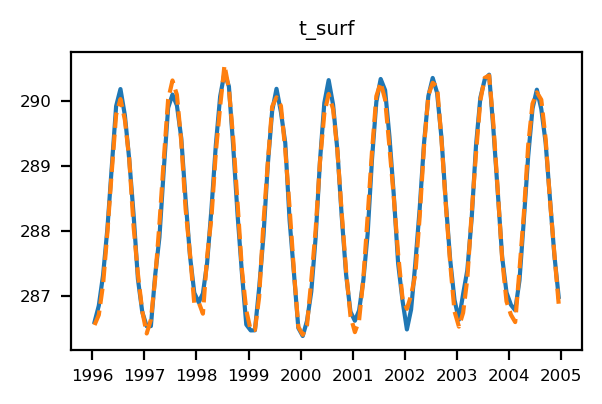

In [11]:
var = 't_surf' 
print('GM trend') 
ds_list = [ds_ba[var],
           ds_nn[var]] 
plot_GM_diff(ds_list,var) 


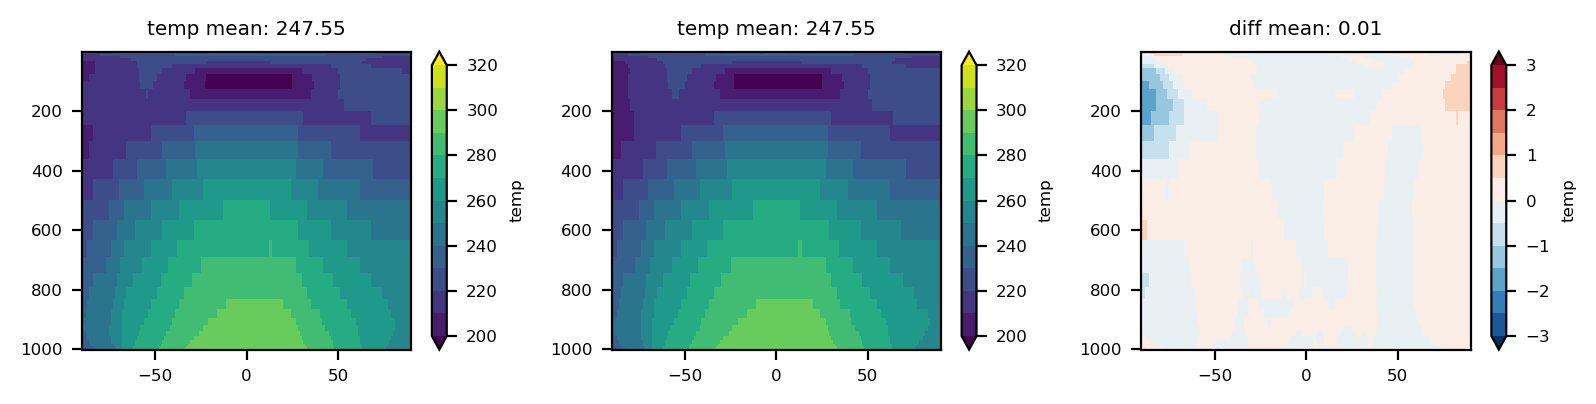

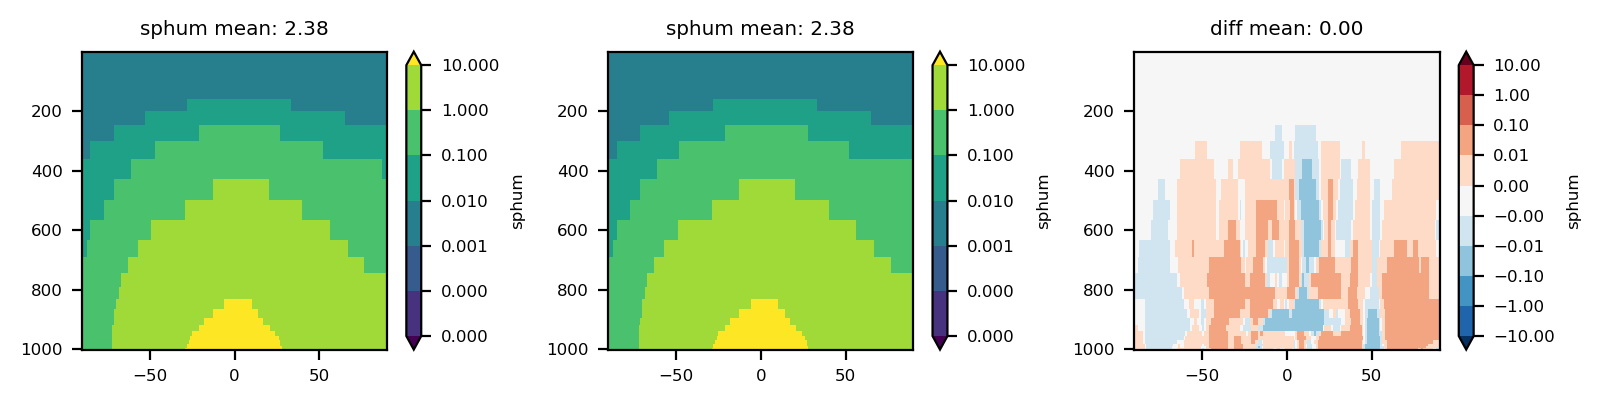

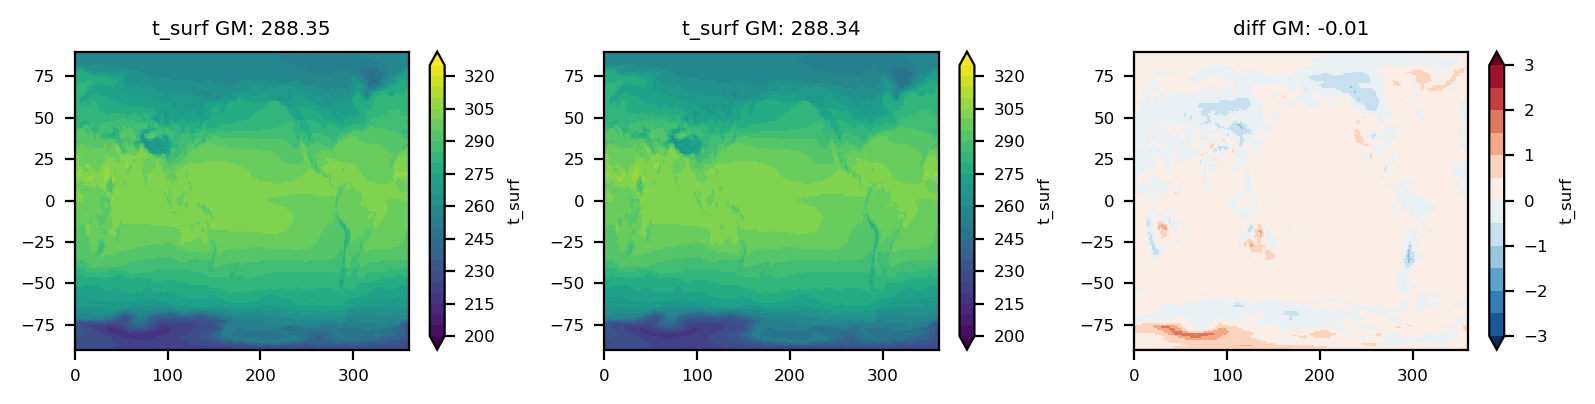

In [12]:
var = 'temp'
ds_list = [ds_ba[var].mean(['time','lon']).load(),
           ds_nn[var].mean(['time','lon']).load()]
plot_zonal_ta_diff(ds_list)

var = 'sphum'
ds_list = [ds_ba[var].mean(['time','lon']).load()*1e3,
           ds_nn[var].mean(['time','lon']).load()*1e3] # g/kg
loglevel = 10**np.arange(-5,2.0,1.0)
dloglevel = np.concatenate([-10**np.arange(1,-3.01,-1),10**np.arange(-3.,1.01,1)])
plot_zonal_ta_diff(ds_list,level = loglevel, dlevel = dloglevel)

var = 't_surf'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(200,330,5), dlevel = np.arange(-3,3.1,0.5)) 

## lw

GM trend


/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()


GM trend


/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()


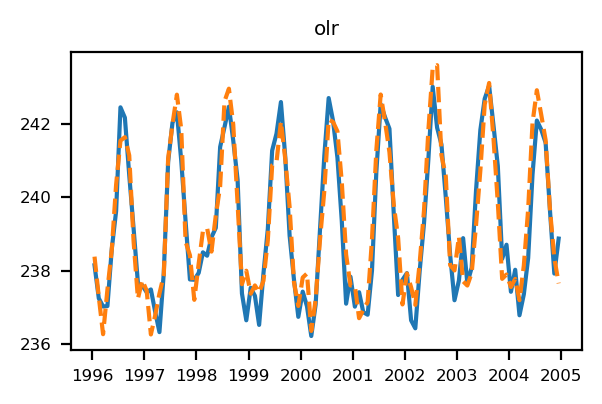

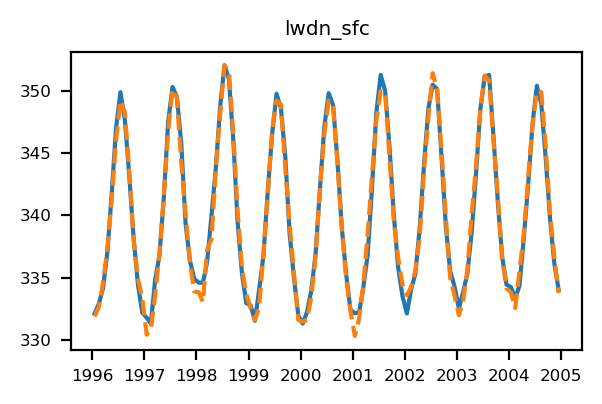

In [13]:
var = 'olr' 
print('GM trend') 
ds_list = [ds_ba[var],
           ds_nn[var]] 
plot_GM_diff(ds_list,var) 
var = 'lwdn_sfc' 
print('GM trend') 
ds_list = [ds_ba[var],
           ds_nn[var]] 
plot_GM_diff(ds_list,var) 


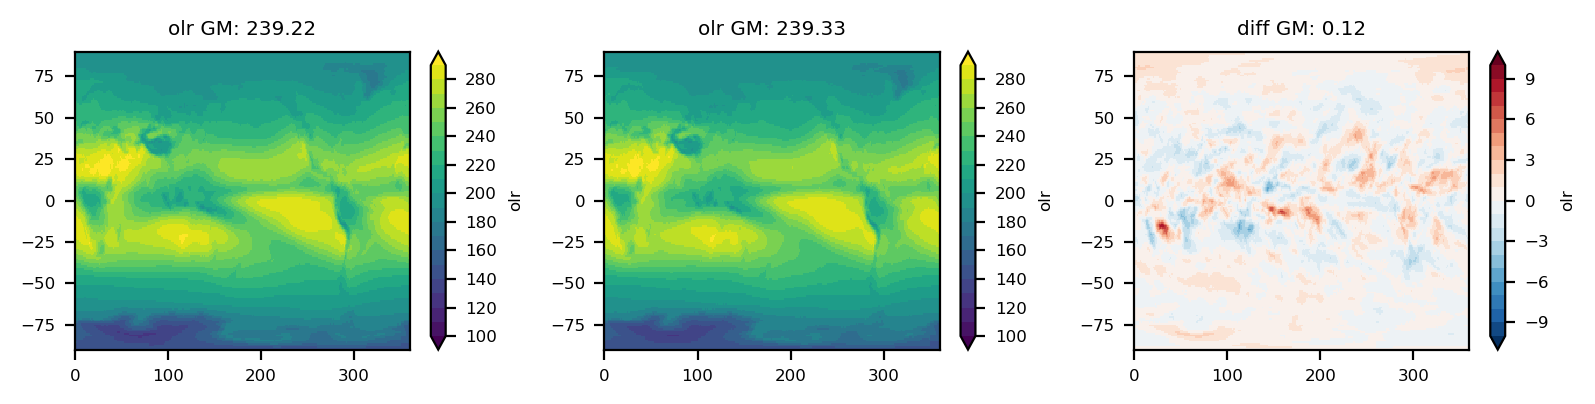

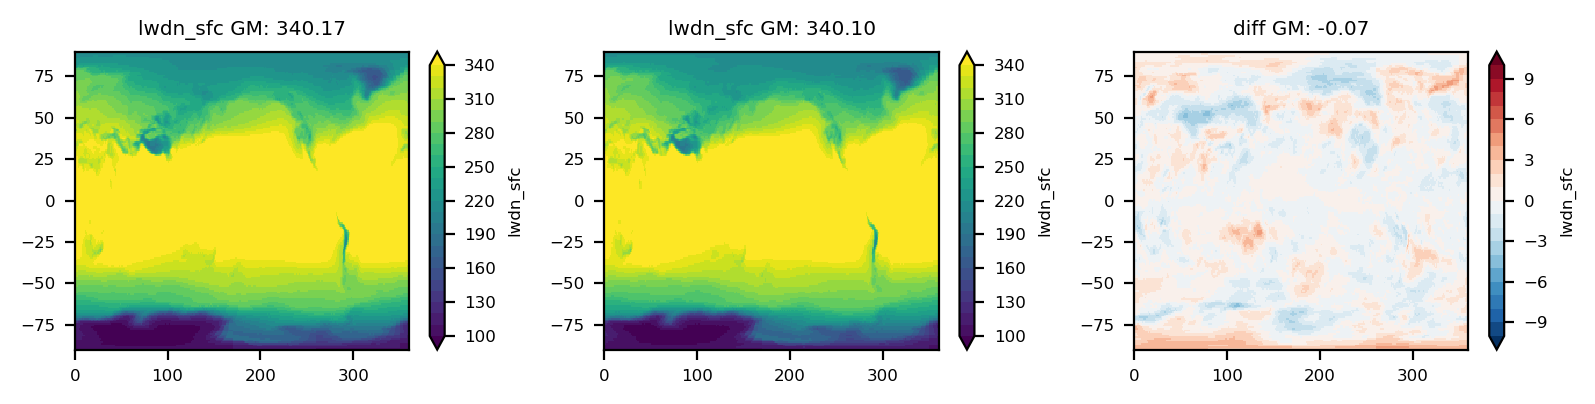

In [14]:
var = 'olr'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-10,10.1,1)) 

var = 'lwdn_sfc'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,350,10), dlevel = np.arange(-10,10.1,1)) 

# sw

GM trend


/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()


GM trend


/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()


GM trend


/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()


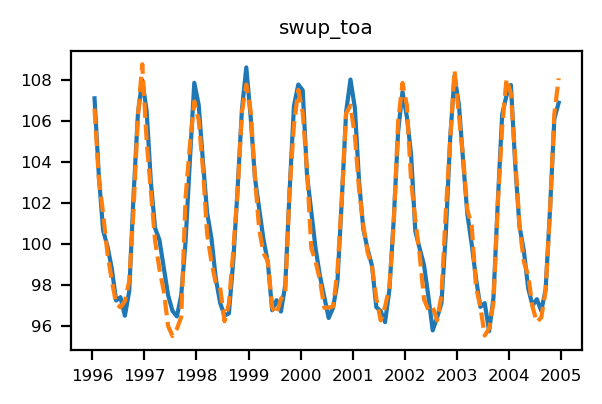

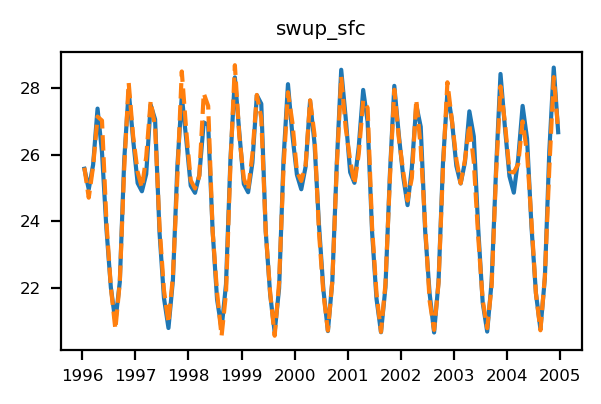

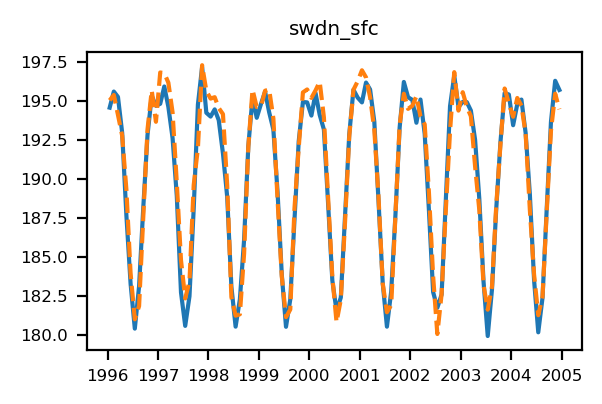

In [15]:
var = 'swup_toa' 
print('GM trend') 
ds_list = [ds_ba[var],
           ds_nn[var]] 
plot_GM_diff(ds_list,var)
var = 'swup_sfc' 
print('GM trend') 
ds_list = [ds_ba[var],
           ds_nn[var]] 
plot_GM_diff(ds_list,var) 
var = 'swdn_sfc' 
print('GM trend') 
ds_list = [ds_ba[var],
           ds_nn[var]] 
plot_GM_diff(ds_list,var) 


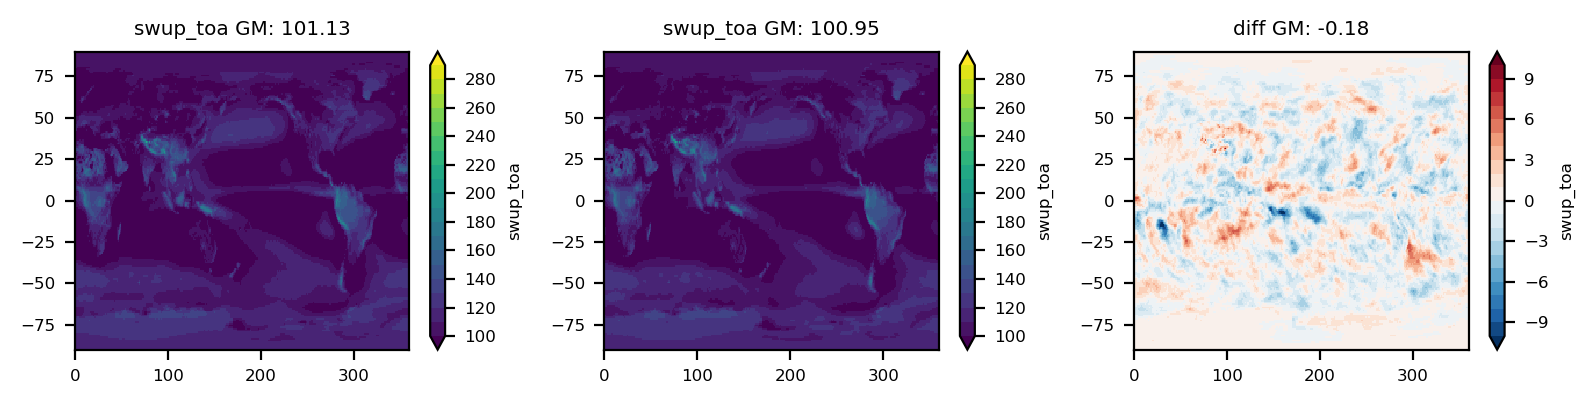

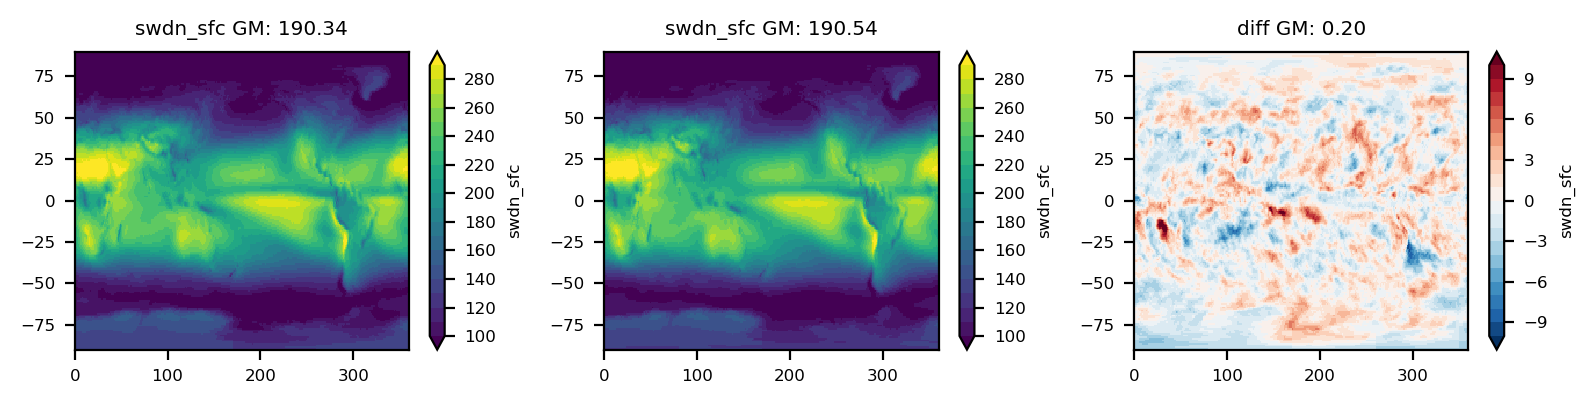

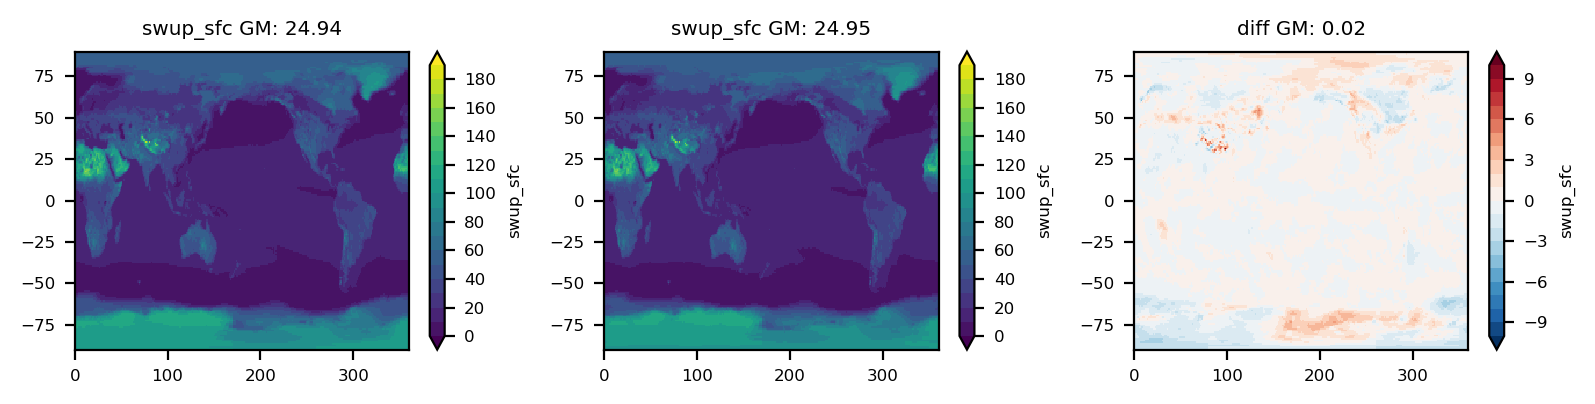

In [16]:
var = 'swup_toa'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-10,10.1,1)) 
var = 'swdn_sfc'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-10,10.1,1))
var = 'swup_sfc'
ds_list = [ds_ba[var].mean('time').load(),
           ds_nn[var].mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(0,200,10), dlevel = np.arange(-10,10.1,1))  

# 3 hourly

In [17]:
file_path = '/scratch/gpfs/cw55/AM4/work/CTL2000_test2000s_nn_stellarcpu_intelmpi_22_768PE/' 
ds = xr.open_mfdataset([file_path+f'POSTP/{year}0101.atmos_8xdaily.nc.monavg.nc' for year in year_list],
                      chunks={"pfull": 3, "time": 240}, parallel=True)  
ds_nn_3h = ds.rename({'grid_yt':'lat','grid_xt':'lon'})

file_path = '/scratch/gpfs/cw55/AM4/work/CTL2000_test2000s_nn_stellarcpu_intelmpi_22_768PE_base/' 
ds = xr.open_mfdataset([file_path+f'POSTP/{year}0101.atmos_8xdaily.nc.monavg.nc' for year in year_list],
                      chunks={"pfull": 3, "time": 240}, parallel=True)  
ds_ba_3h = ds.rename({'grid_yt':'lat','grid_xt':'lon'})

GM trend


/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates

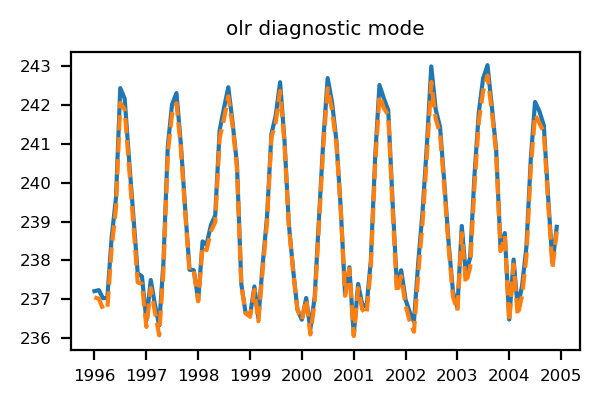

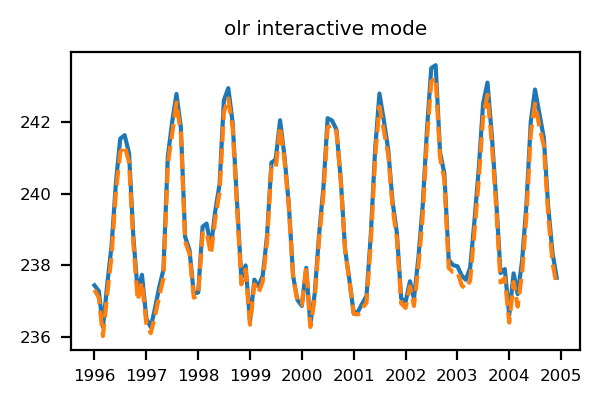

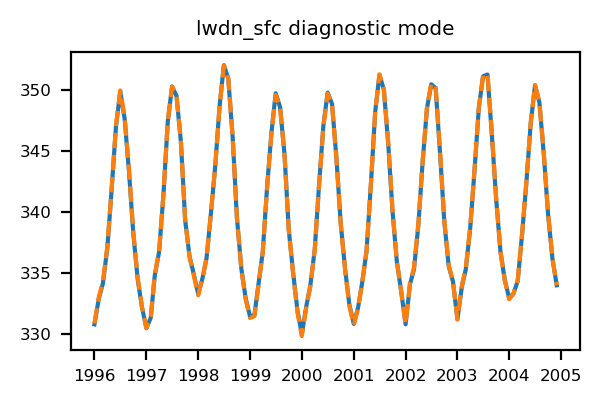

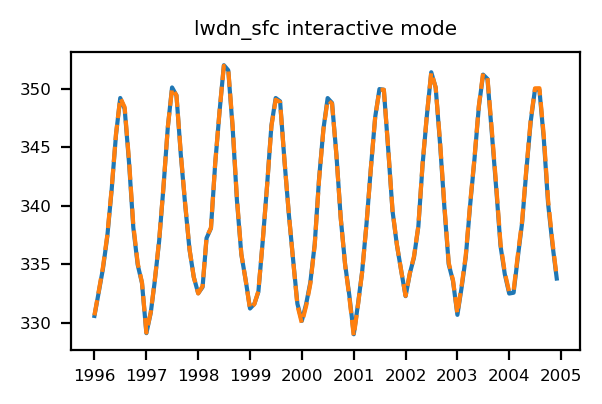

In [18]:
var = 'olr' 
print('GM trend') 
ds_list = [ds_ba_3h[var],
           ds_ba_3h[f'nn_{var}']]
plot_GM_diff(ds_list, var + ' diagnostic mode') 
ds_list = [ds_nn_3h[var],
           ds_nn_3h[f'nn_{var}']]
plot_GM_diff(ds_list, var + ' interactive mode') 
var = 'lwdn_sfc'  
ds_list = [ds_ba_3h[var],
           ds_ba_3h[f'nn_{var}']]
plot_GM_diff(ds_list, var + ' diagnostic mode') 
ds_list = [ds_nn_3h[var],
           ds_nn_3h[f'nn_{var}']]
plot_GM_diff(ds_list, var + ' interactive mode') 

In [19]:
mon_sel=np.arange(1,13)
time_sel = ds_nn_3h.time.dt.month.isin(mon_sel)

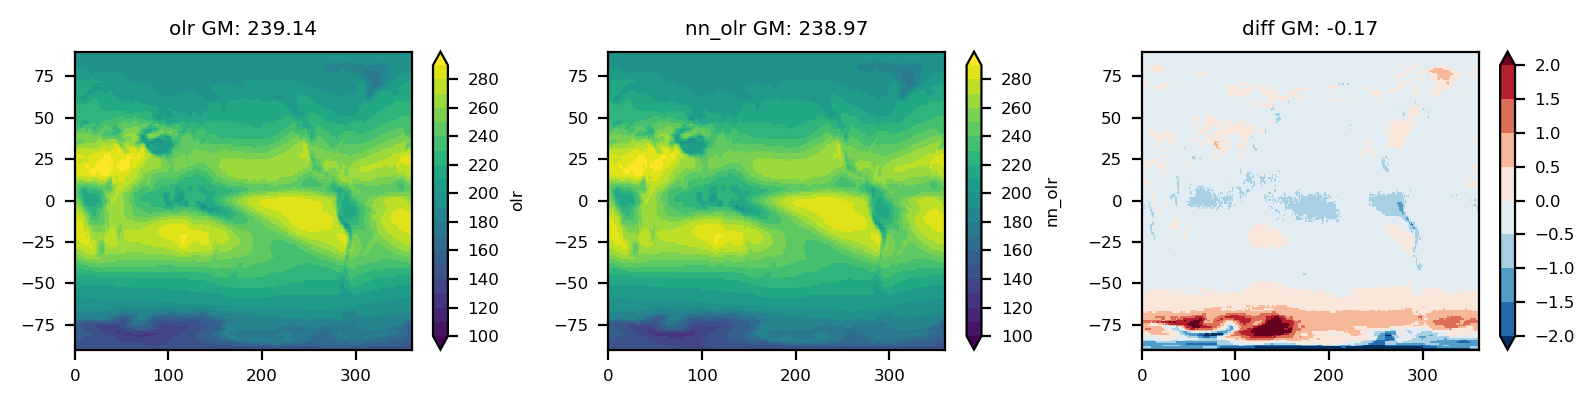

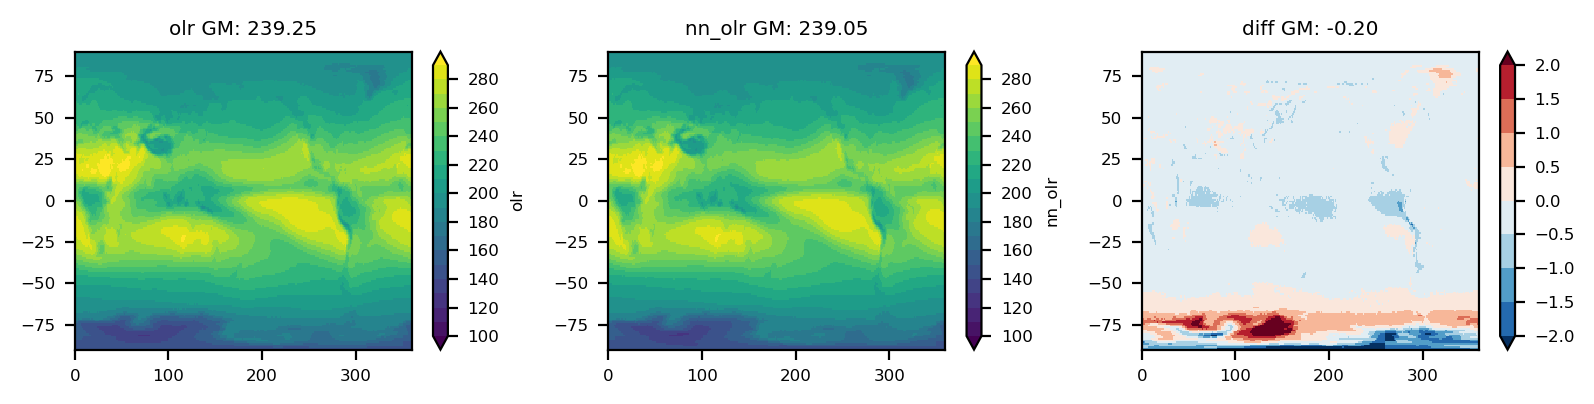

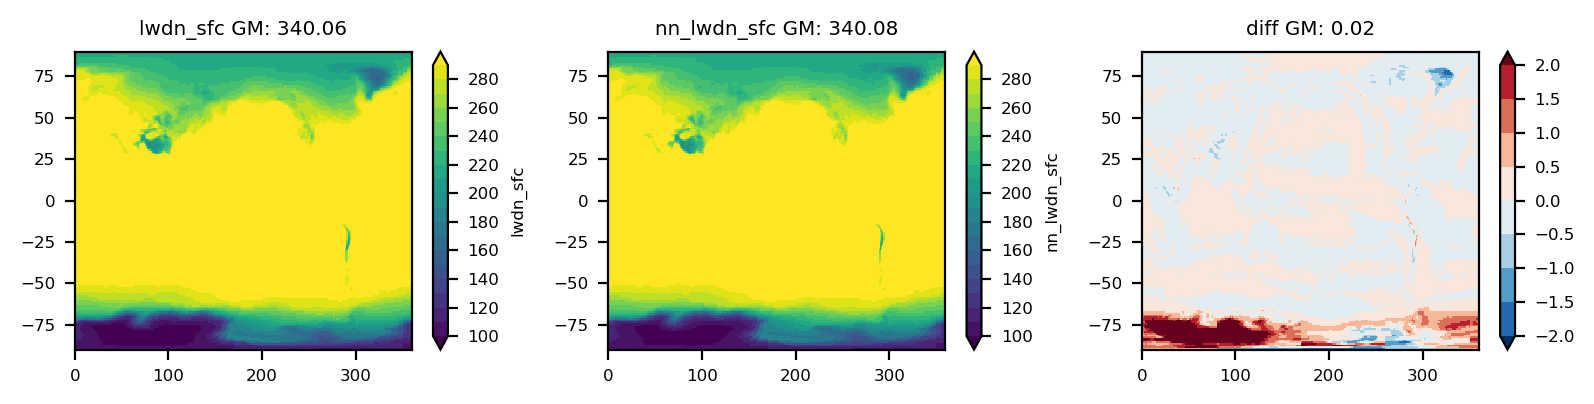

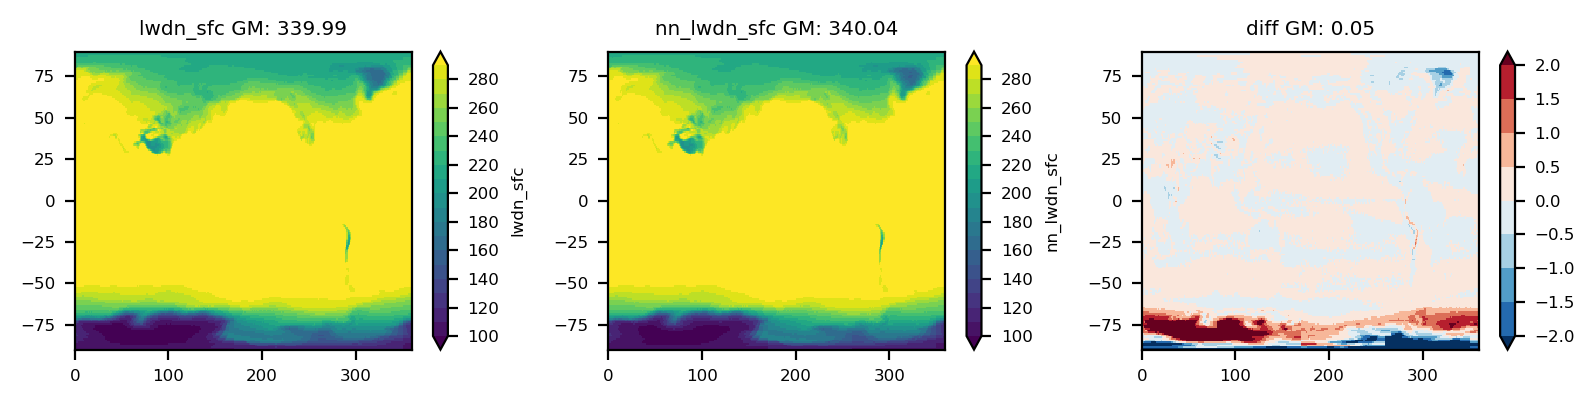

In [20]:
ds_list = [ds_ba_3h['olr'].isel(time=time_sel).mean('time').load(),
           ds_ba_3h['nn_olr'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-2,2.1,0.5)) 
ds_list = [ds_nn_3h['olr'].isel(time=time_sel).mean('time').load(),
           ds_nn_3h['nn_olr'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-2,2.1,0.5)) 

ds_list = [ds_ba_3h['lwdn_sfc'].isel(time=time_sel).mean('time').load(),
           ds_ba_3h['nn_lwdn_sfc'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-2,2.1,0.5)) 
ds_list = [ds_nn_3h['lwdn_sfc'].isel(time=time_sel).mean('time').load(),
           ds_nn_3h['nn_lwdn_sfc'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-2,2.1,0.5)) 

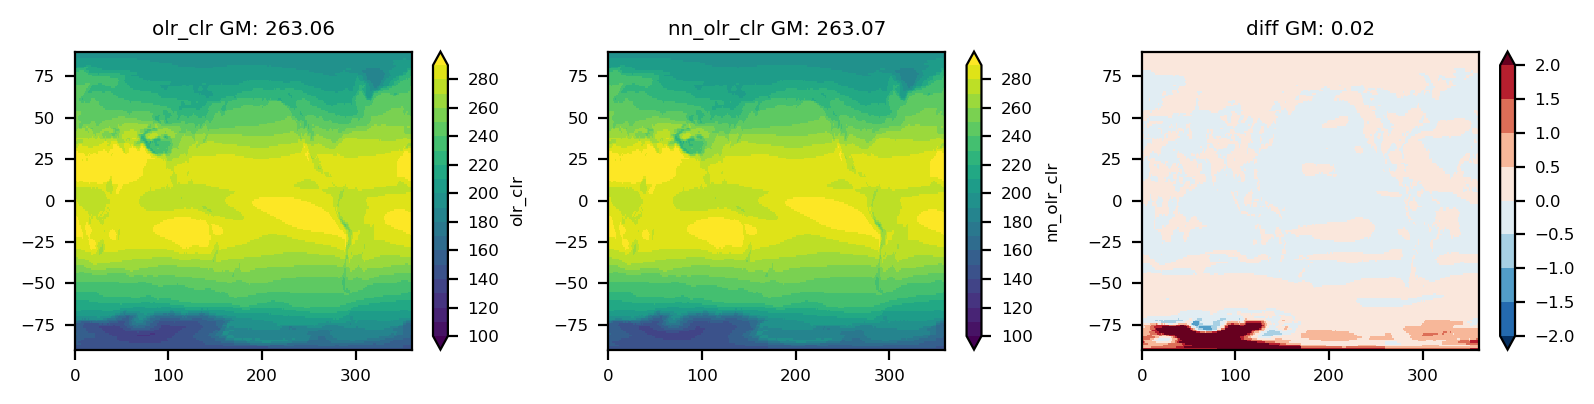

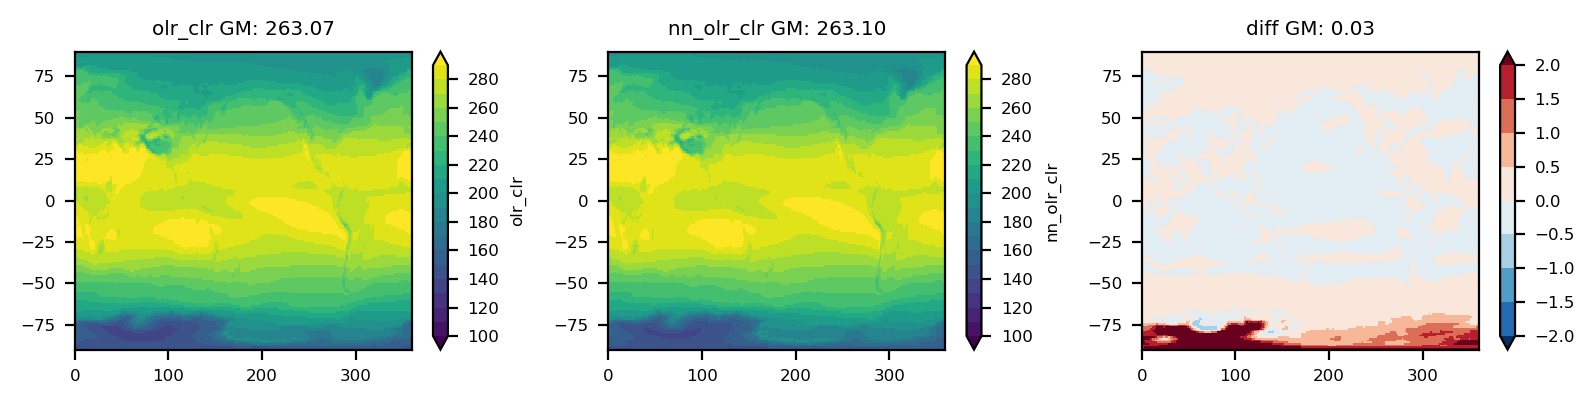

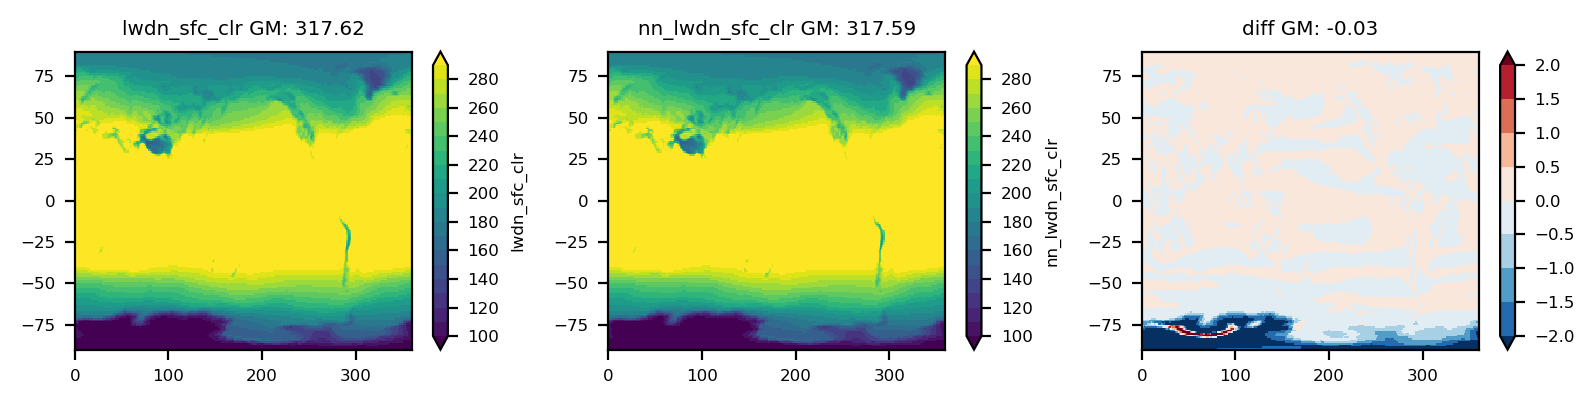

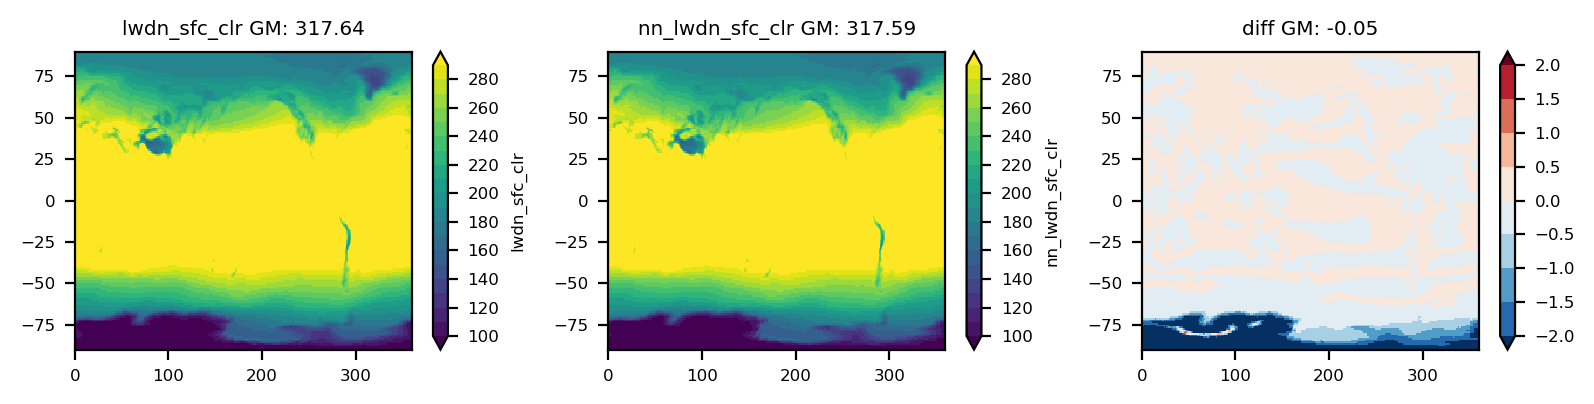

In [21]:
ds_list = [ds_ba_3h['olr_clr'].isel(time=time_sel).mean('time').load(),
           ds_ba_3h['nn_olr_clr'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-2,2.1,0.5)) 
ds_list = [ds_nn_3h['olr_clr'].isel(time=time_sel).mean('time').load(),
           ds_nn_3h['nn_olr_clr'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-2,2.1,0.5)) 

ds_list = [ds_ba_3h['lwdn_sfc_clr'].isel(time=time_sel).mean('time').load(),
           ds_ba_3h['nn_lwdn_sfc_clr'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-2,2.1,0.5)) 
ds_list = [ds_nn_3h['lwdn_sfc_clr'].isel(time=time_sel).mean('time').load(),
           ds_nn_3h['nn_lwdn_sfc_clr'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,300,10), dlevel = np.arange(-2,2.1,0.5)) 

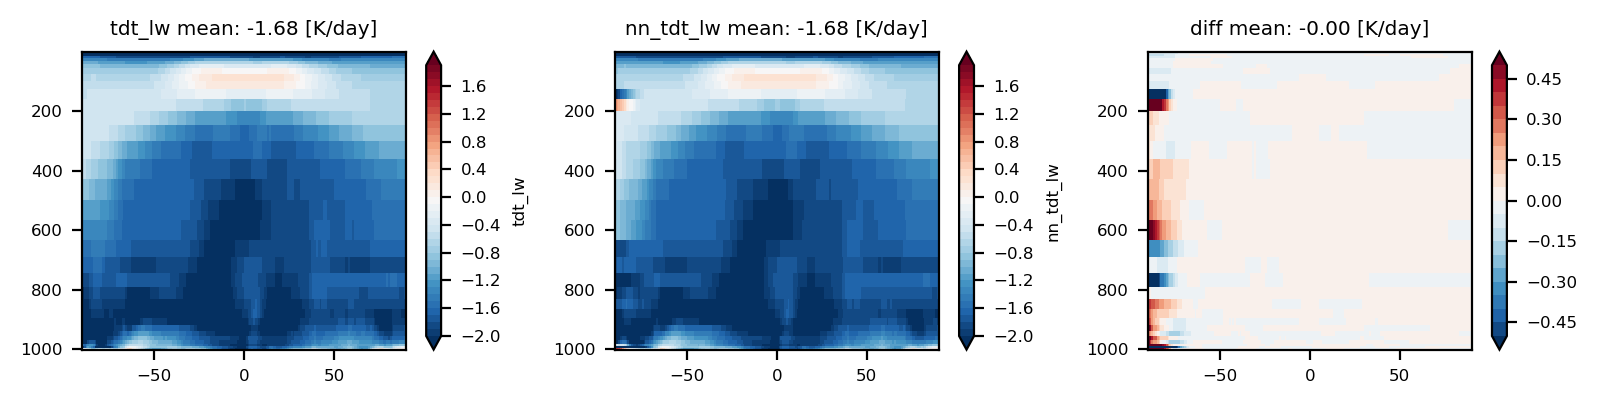

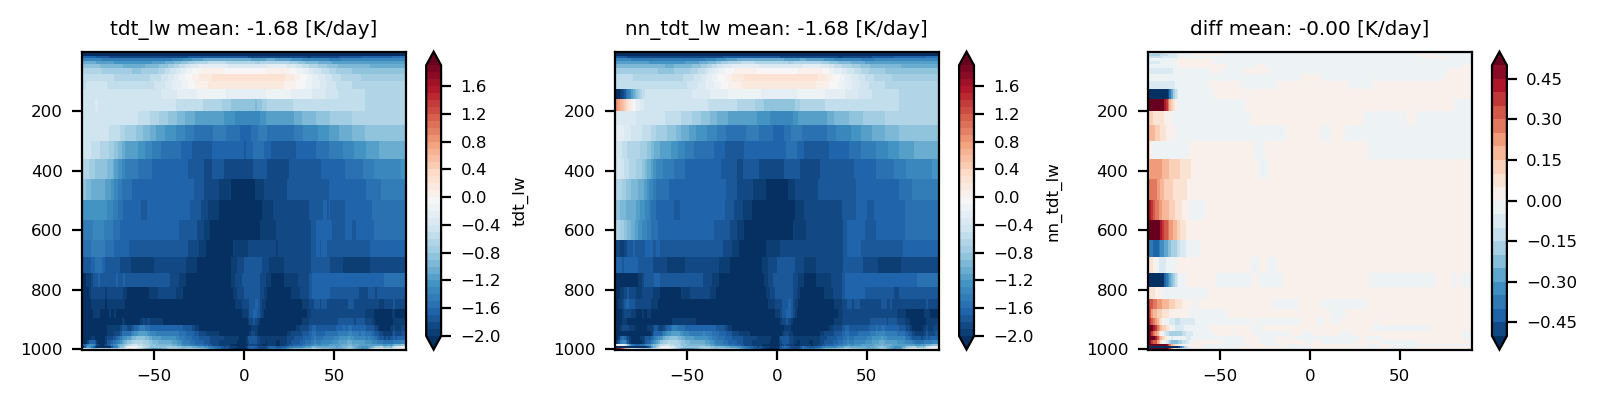

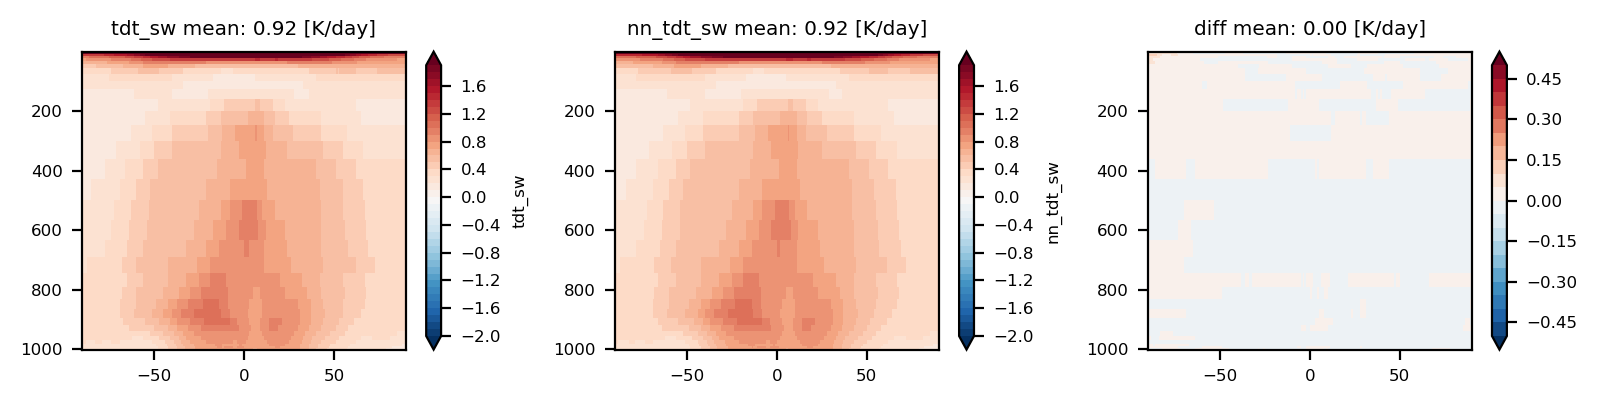

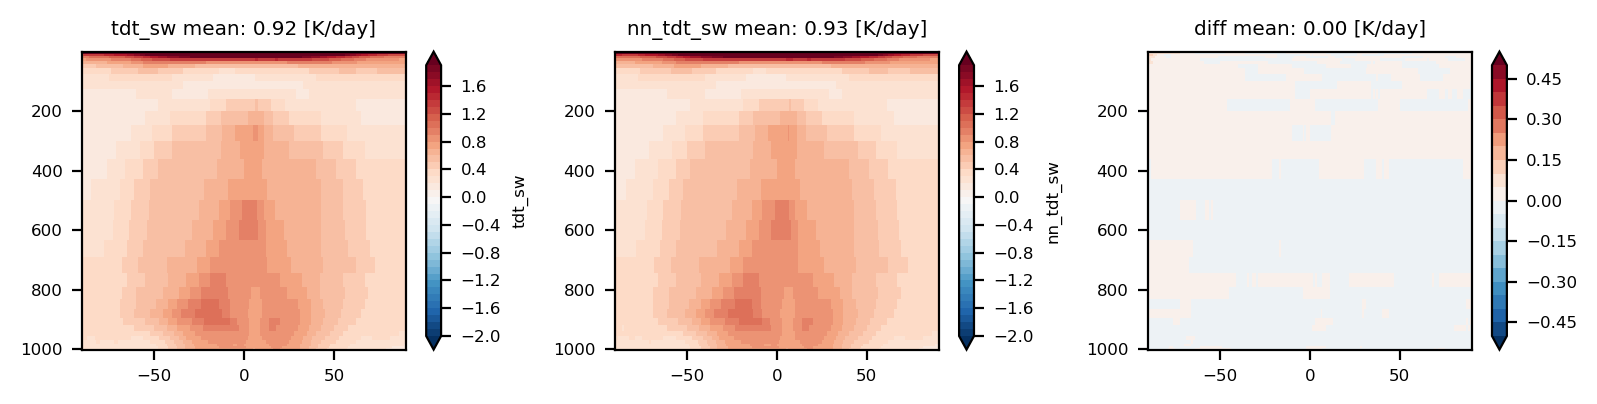

In [22]:
ds_list = [ds_ba_3h['tdt_lw'   ].isel(time=time_sel).mean(['time','lon']).load()*86400,
           ds_ba_3h['nn_tdt_lw'].isel(time=time_sel).mean(['time','lon']).load()*86400]
plot_zonal_tdt_diff(ds_list ) 
ds_list = [ds_nn_3h['tdt_lw'   ].isel(time=time_sel).mean(['time','lon']).load()*86400,
           ds_nn_3h['nn_tdt_lw'].isel(time=time_sel).mean(['time','lon']).load()*86400]
plot_zonal_tdt_diff(ds_list ) 

ds_list = [ds_ba_3h['tdt_sw'   ].isel(time=time_sel).mean(['time','lon']).load()*86400,
           ds_ba_3h['nn_tdt_sw'].isel(time=time_sel).mean(['time','lon']).load()*86400]
plot_zonal_tdt_diff(ds_list ) 
ds_list = [ds_nn_3h['tdt_sw'   ].isel(time=time_sel).mean(['time','lon']).load()*86400,
           ds_nn_3h['nn_tdt_sw'].isel(time=time_sel).mean(['time','lon']).load()*86400]
plot_zonal_tdt_diff(ds_list ) 

GM trend


/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  timeaxis = da.indexes['time'].to_datetimeindex()
/tmp/ipykernel_2067662/2983054862.py:60: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates

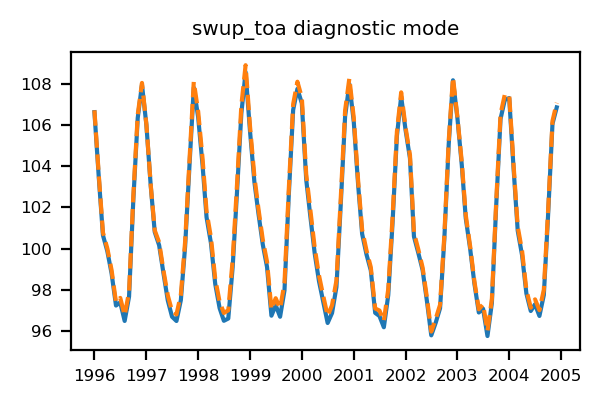

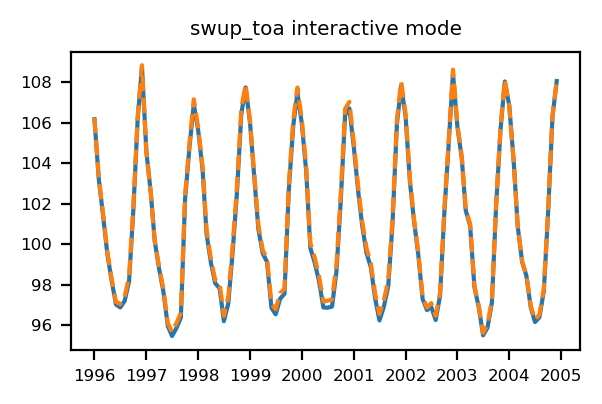

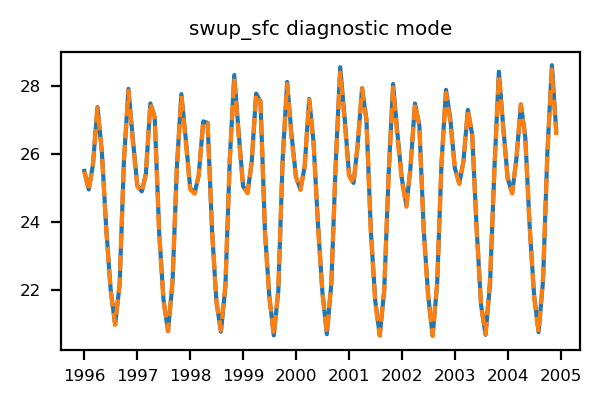

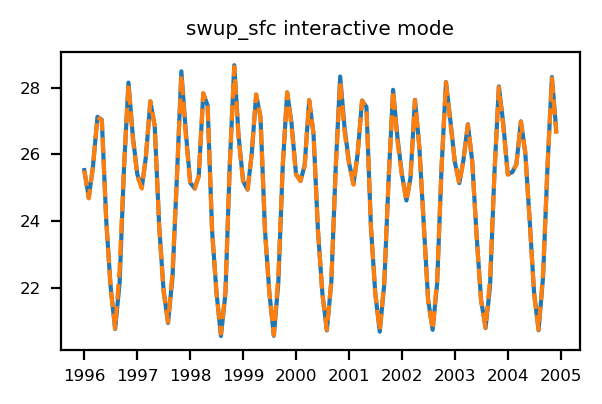

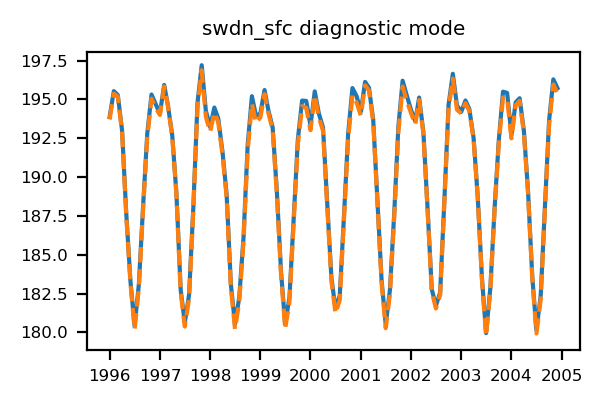

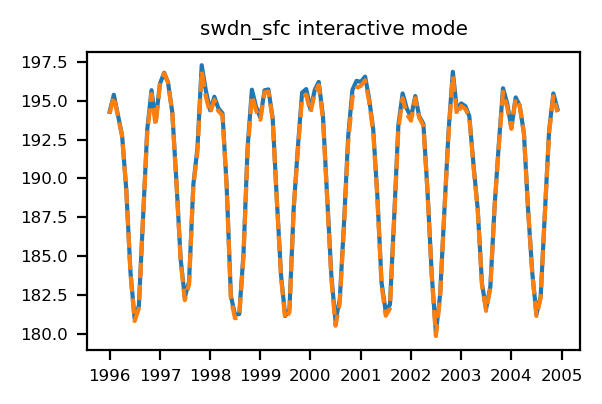

In [23]:
var = 'swup_toa' 
print('GM trend') 
ds_list = [ds_ba_3h[var],
           ds_ba_3h[f'nn_{var}']]
plot_GM_diff(ds_list, var + ' diagnostic mode') 
ds_list = [ds_nn_3h[var],
           ds_nn_3h[f'nn_{var}']]
plot_GM_diff(ds_list, var + ' interactive mode') 
var = 'swup_sfc' 
ds_list = [ds_ba_3h[var],
           ds_ba_3h[f'nn_{var}']]
plot_GM_diff(ds_list, var + ' diagnostic mode') 
ds_list = [ds_nn_3h[var],
           ds_nn_3h[f'nn_{var}']]
plot_GM_diff(ds_list, var + ' interactive mode') 
var = 'swdn_sfc' 
ds_list = [ds_ba_3h[var],
           ds_ba_3h[f'nn_{var}']]
plot_GM_diff(ds_list, var + ' diagnostic mode') 
ds_list = [ds_nn_3h[var],
           ds_nn_3h[f'nn_{var}']]
plot_GM_diff(ds_list, var + ' interactive mode') 

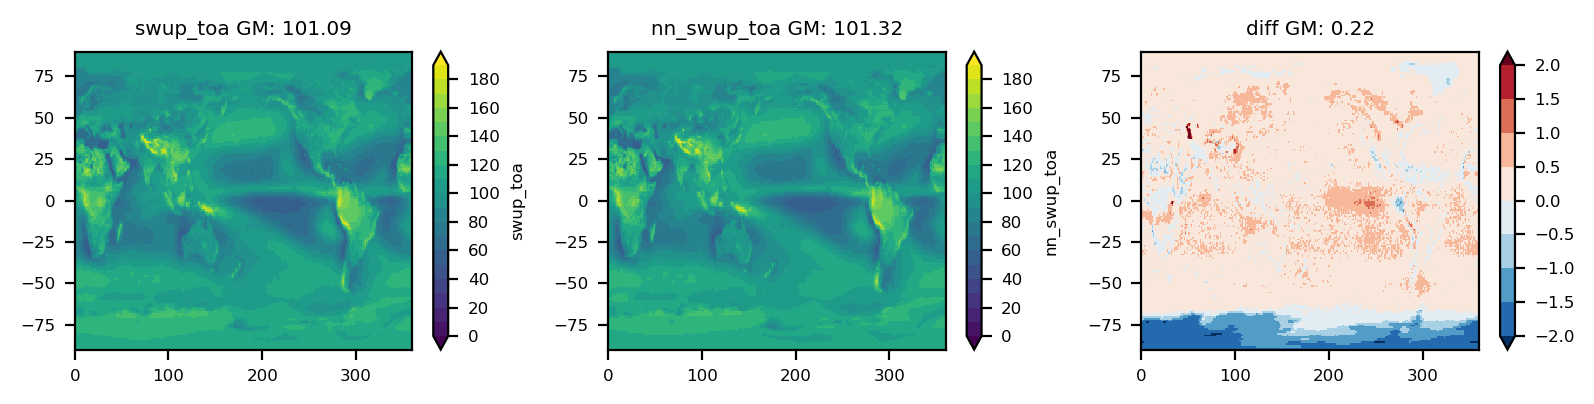

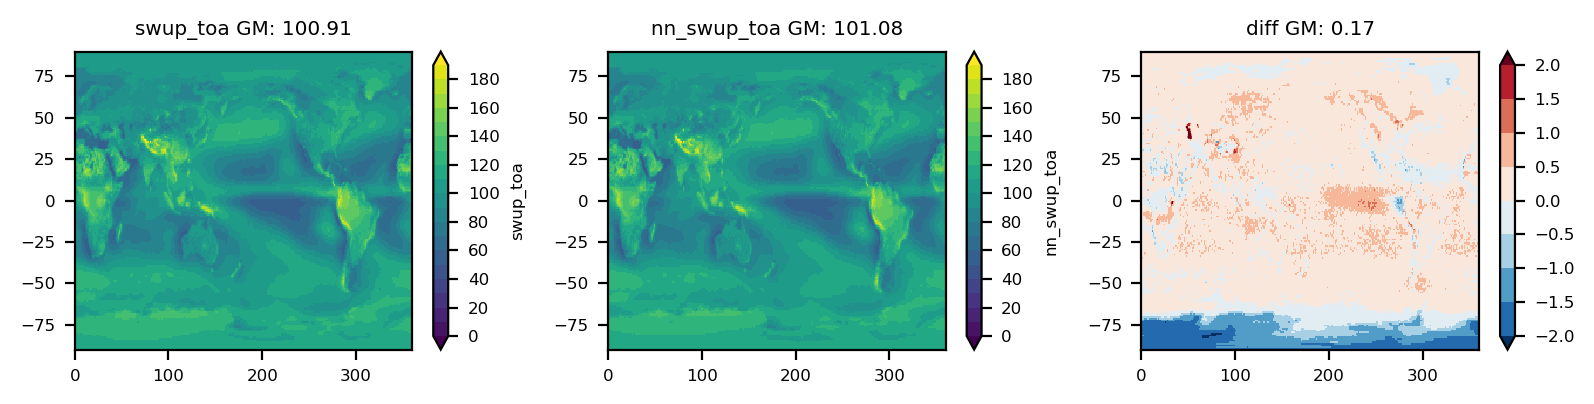

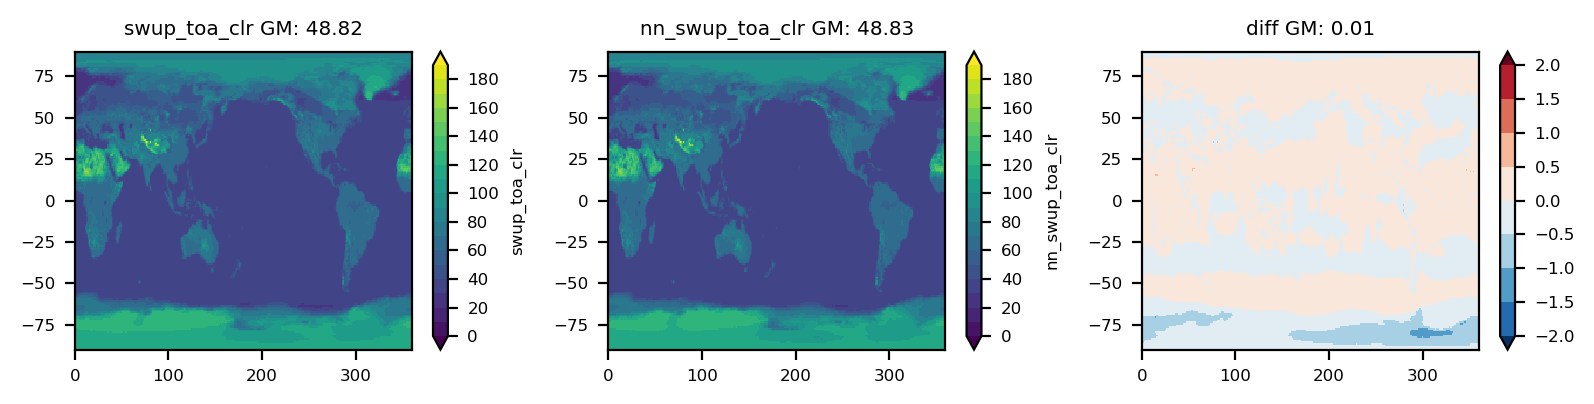

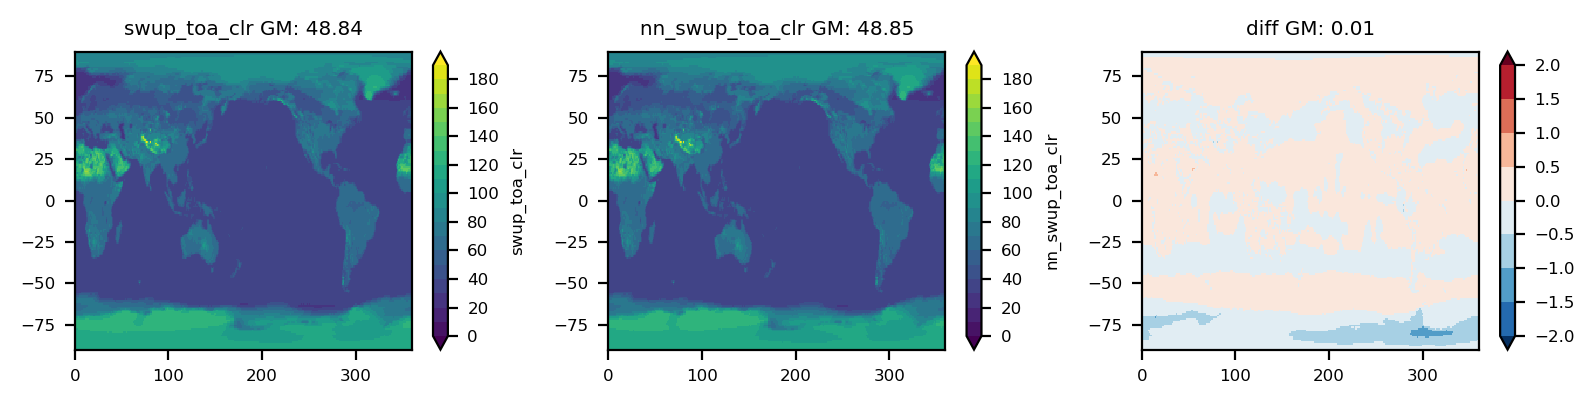

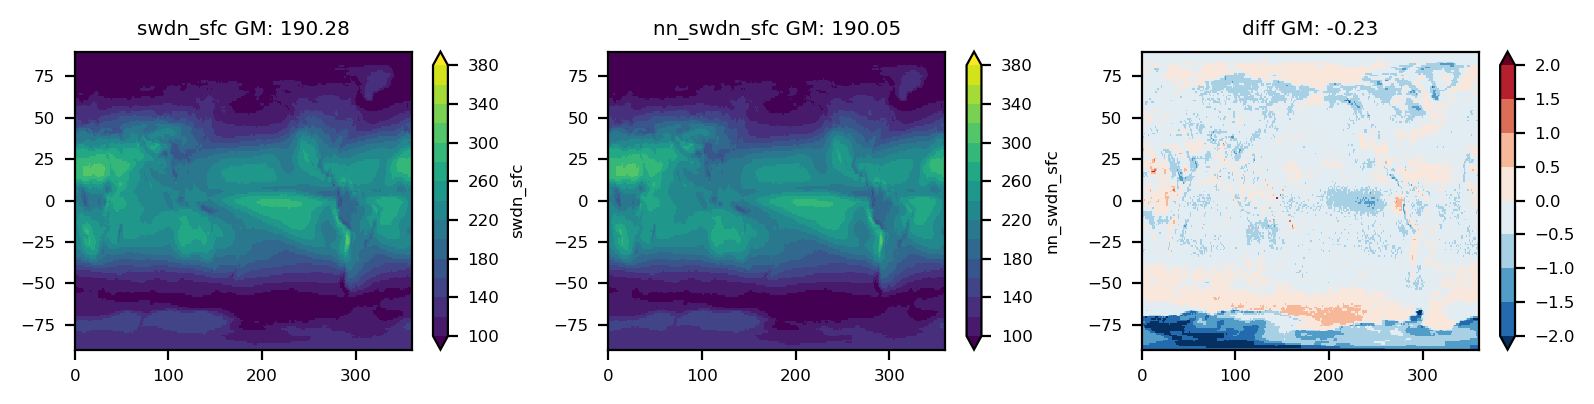

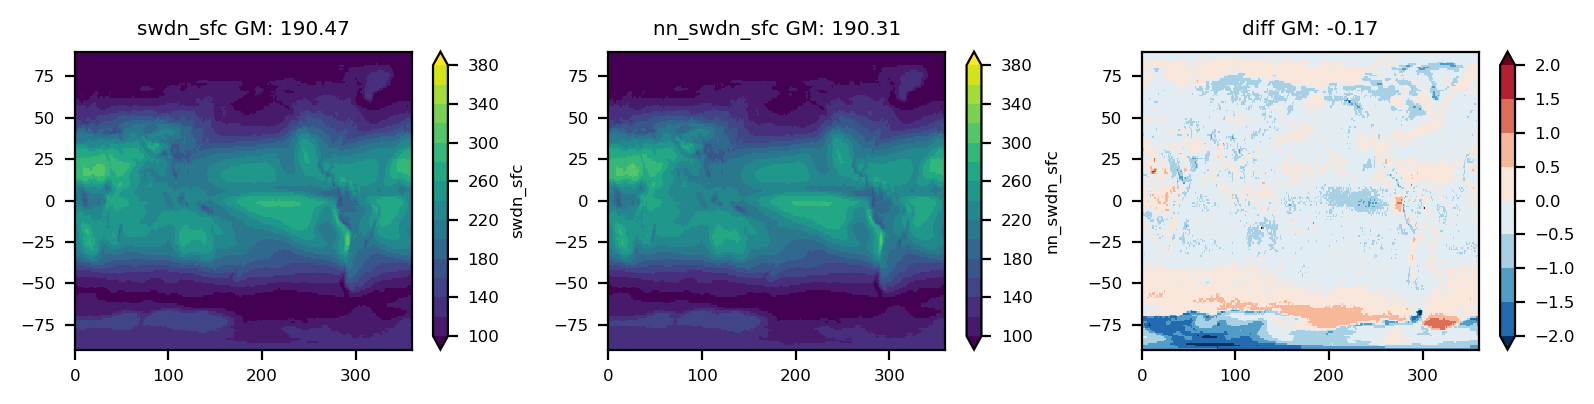

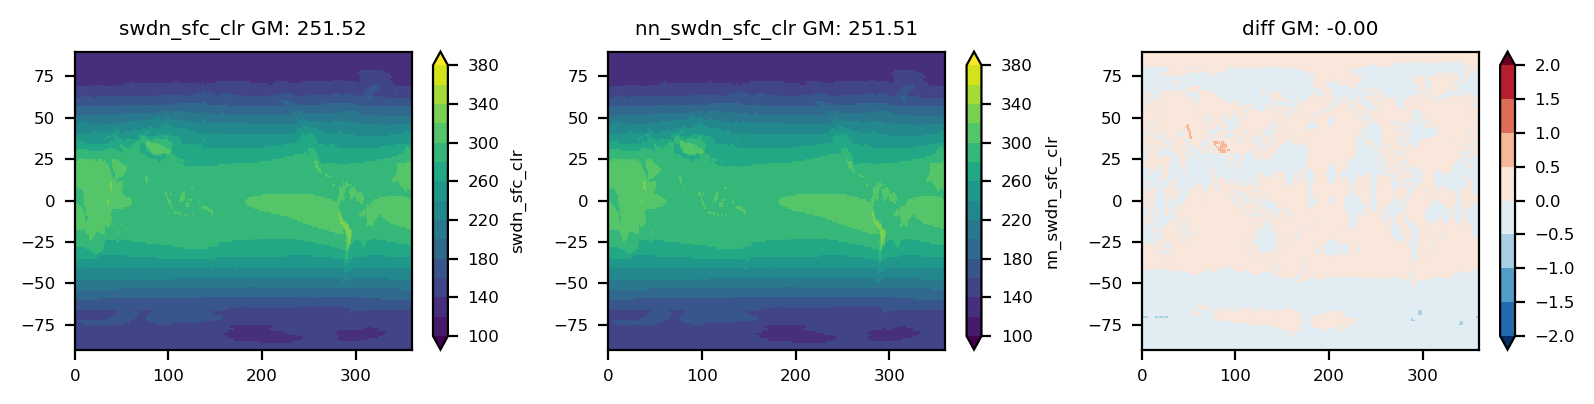

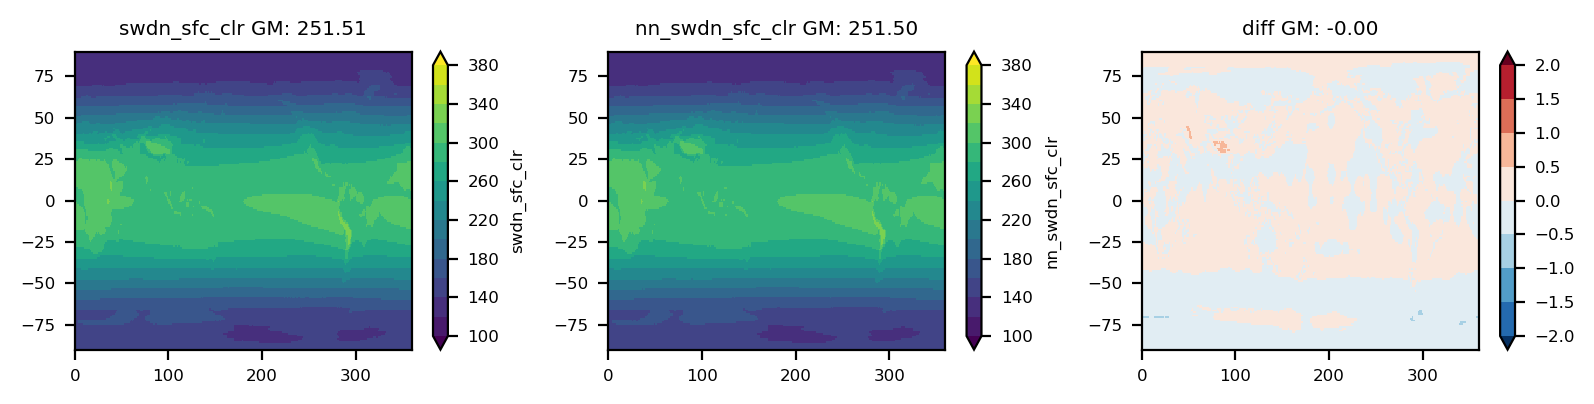

In [24]:

ds_list = [ds_ba_3h['swup_toa'].isel(time=time_sel).mean('time').load(),
           ds_ba_3h['nn_swup_toa'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(0,200,10), dlevel = np.arange(-2,2.1,0.5)) 
ds_list = [ds_nn_3h['swup_toa'].isel(time=time_sel).mean('time').load(),
           ds_nn_3h['nn_swup_toa'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(0,200,10), dlevel = np.arange(-2,2.1,0.5)) 

ds_list = [ds_ba_3h['swup_toa_clr'].isel(time=time_sel).mean('time').load(),
           ds_ba_3h['nn_swup_toa_clr'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(0,200,10), dlevel = np.arange(-2,2.1,0.5)) 
ds_list = [ds_nn_3h['swup_toa_clr'].isel(time=time_sel).mean('time').load(),
           ds_nn_3h['nn_swup_toa_clr'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(0,200,10), dlevel = np.arange(-2,2.1,0.5)) 

ds_list = [ds_ba_3h['swdn_sfc'].isel(time=time_sel).mean('time').load(),
           ds_ba_3h['nn_swdn_sfc'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,400,20), dlevel = np.arange(-2,2.1,0.5)) 
ds_list = [ds_nn_3h['swdn_sfc'].isel(time=time_sel).mean('time').load(),
           ds_nn_3h['nn_swdn_sfc'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,400,20), dlevel = np.arange(-2,2.1,0.5)) 

ds_list = [ds_ba_3h['swdn_sfc_clr'].isel(time=time_sel).mean('time').load(),
           ds_ba_3h['nn_swdn_sfc_clr'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,400,20), dlevel = np.arange(-2,2.1,0.5)) 
ds_list = [ds_nn_3h['swdn_sfc_clr'].isel(time=time_sel).mean('time').load(),
           ds_nn_3h['nn_swdn_sfc_clr'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,400,20), dlevel = np.arange(-2,2.1,0.5)) 

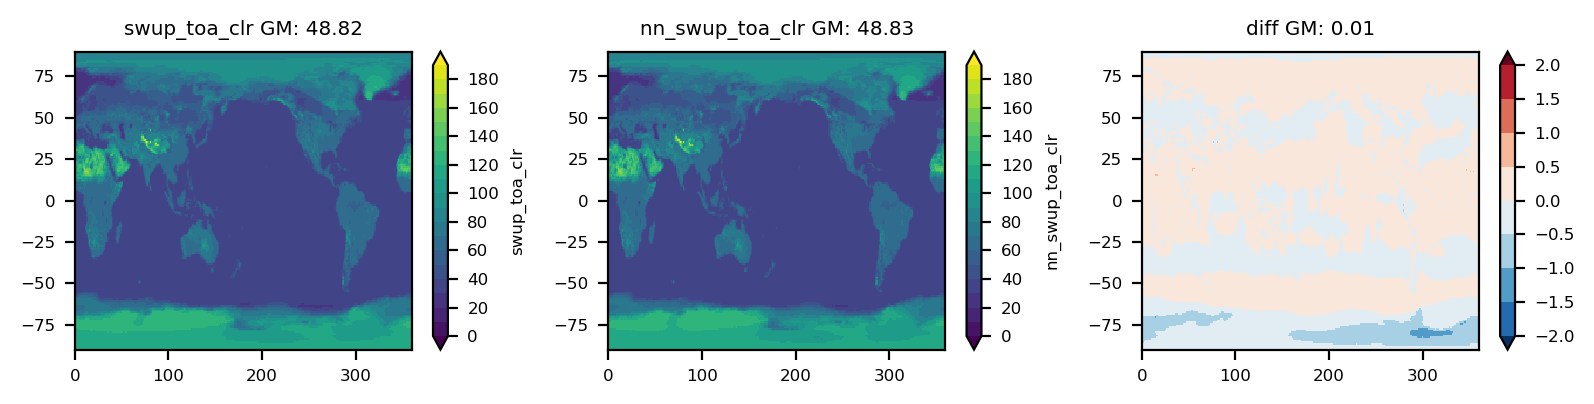

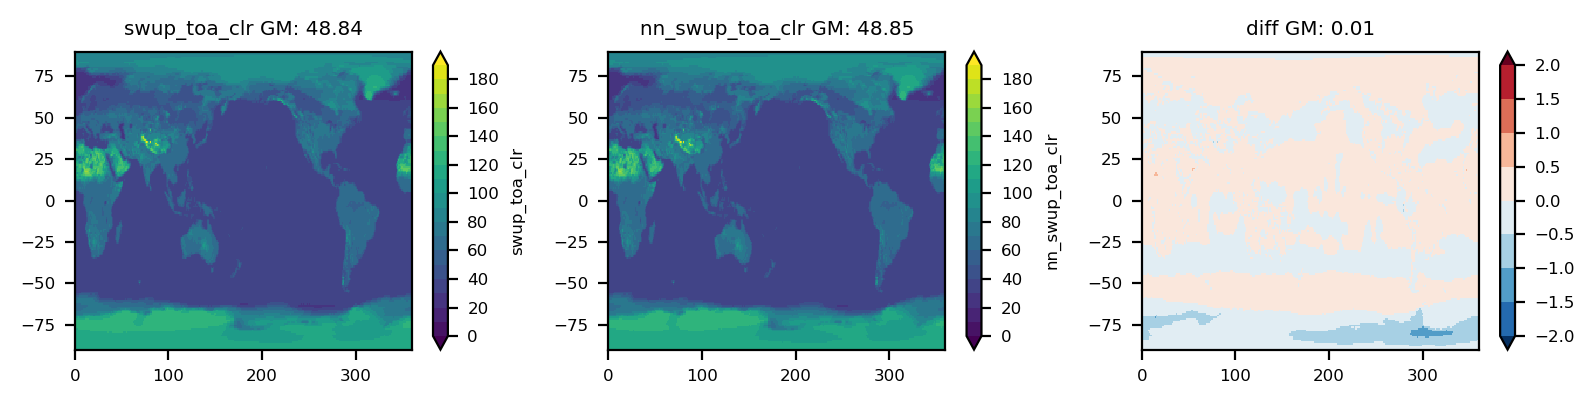

In [25]:
ds_list = [ds_ba_3h['swup_toa_clr'].isel(time=time_sel).mean('time').load(),
           ds_ba_3h['nn_swup_toa_clr'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(0,200,10), dlevel = np.arange(-2,2.1,0.5)) 
ds_list = [ds_nn_3h['swup_toa_clr'].isel(time=time_sel).mean('time').load(),
           ds_nn_3h['nn_swup_toa_clr'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(0,200,10), dlevel = np.arange(-2,2.1,0.5)) 

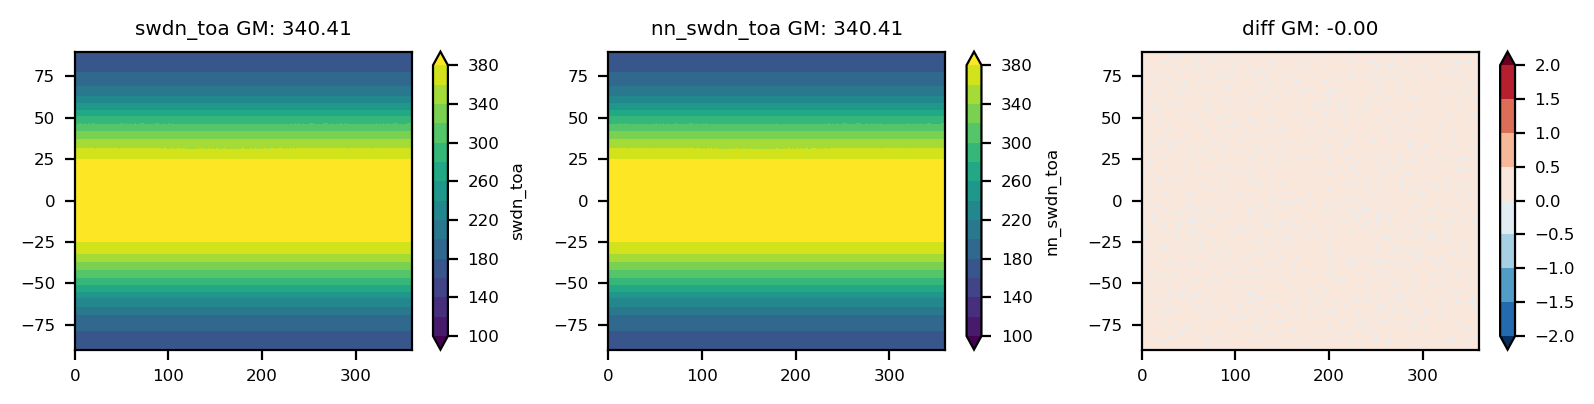

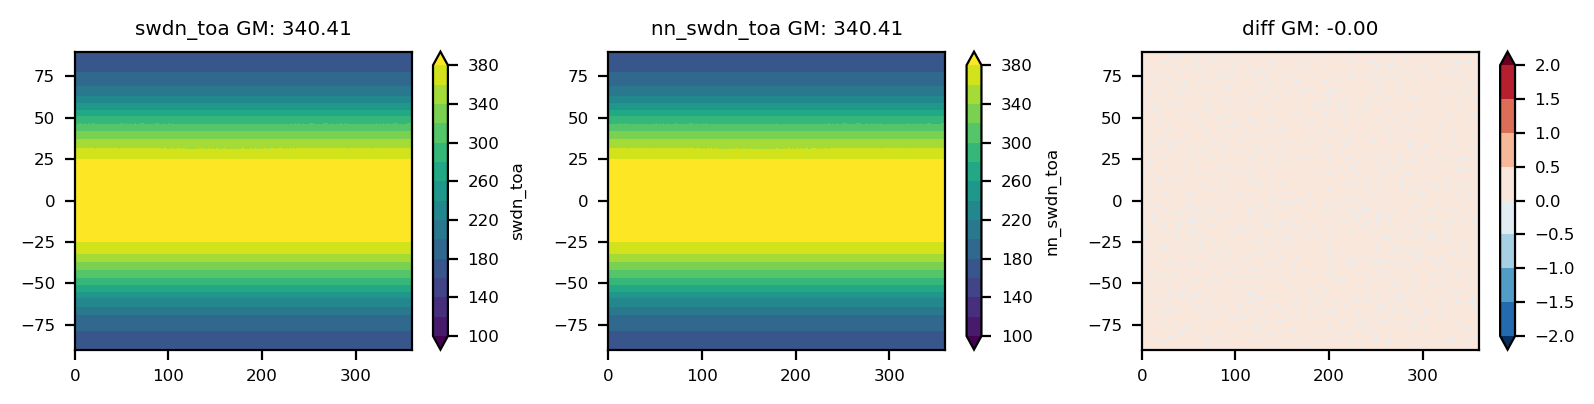

In [26]:
ds_list = [ds_ba_3h['swdn_toa'].isel(time=time_sel).mean('time').load(),
           ds_ba_3h['nn_swdn_toa'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,400,20), dlevel = np.arange(-2,2.1,0.5)) 
ds_list = [ds_nn_3h['swdn_toa'].isel(time=time_sel).mean('time').load(),
           ds_nn_3h['nn_swdn_toa'].isel(time=time_sel).mean('time').load()]
plot_ds12_diff(ds_list,level = np.arange(100,400,20), dlevel = np.arange(-2,2.1,0.5)) 